In [1]:
import numpy as np
import scipy as sp
import scipy.special
import matplotlib.pyplot as plt
import mpmath as mp
from mpmath import hyp1f1
import KGInt as kg

%matplotlib inline

In [2]:
makefloat = np.frompyfunc(float,1,1)
F         = np.frompyfunc(hyp1f1, 3,1)
goreal    = np.frompyfunc(lambda a: a.real, 1,1)
goimag    = np.frompyfunc(lambda a: a.imag, 1,1)

In [3]:
#plot hypergeometric
#hypgeom from mathmp package
def plot(A, kr, eta, label=""):
    y = np.linspace(-1,1, len(A))
    v=makefloat(goreal(A))
    plt.figure(0,(14,7))
    plt.xlabel("y", fontsize=14)
    if len(label)>0:
        plt.ylabel(label)
    else:
        plt.ylabel( r'${}_{1}F_1(1+i%.2f, 1, i %.1f (1+y)$'%(eta,kr), fontsize=14)
    plt.plot(y,v)
    
def diff(A1, A2, kr, eta,nolog=False):
    y = np.linspace(-1,1, len(A1))
    plt.figure(0,(14,7))
    if not nolog:
        plt.yscale("log")
    plt.xlabel("y", fontsize=18)
    plt.ylabel( r'|my impl. - mpmath| precent, eta=%.2f, kr=%.1f'%(eta,kr), fontsize=18)
    plt.plot(y,100*abs(A1-A2)/abs(A1), '.')

In [4]:
a = 1+0.3j
b = 1
N=1000
z= 1j*np.linspace(0, 100*N, N)
y = F(a,b,z)

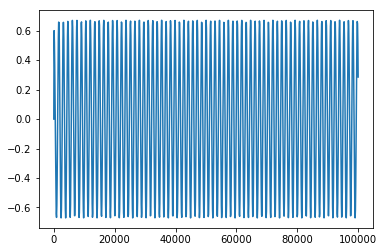

In [5]:
plt.plot(np.linspace(0, 100*N, N), makefloat(goimag(y)))

## mpmath and my impl. diff for some values

In [6]:
a=np.linspace(0.5, 1, 26)

In [7]:
res_my=[]
for aa in a:
    res_my.append(kg.hyp1f1(-1j*aa, 1, np.array([1j*50*aa])))
res_my=np.array(res_my)

TypeError: hyp1f1() missing 3 required positional arguments: 'x0', 'x1', and 'N'

In [7]:
res_mp=F(-1j*a, 1, 1j*50*a)

In [8]:
res_my

array([[-0.69074065+2.60705446j],
       [-1.01362791+2.65025751j],
       [-1.33760798+2.62802316j],
       [-1.63255966+2.56570989j],
       [-1.90158246+2.50229826j],
       [-2.18026021+2.45788411j],
       [-2.50937589+2.41332926j],
       [-2.90049997+2.31963515j],
       [-3.32147139+2.13236286j],
       [-3.71536001+1.84585568j],
       [-4.04091651+1.49974091j],
       [-4.30407235+1.14978227j],
       [-4.55424423+0.8230321j ],
       [-4.84487884+0.49184674j],
       [-5.18637382+0.08964626j],
       [-5.52850656-0.43994164j],
       [-5.78958226-1.09661801j],
       [-5.91371909-1.81726265j],
       [-5.91312548-2.51921777j],
       [-5.85978346-3.1633089j ],
       [-5.82791545-3.78789109j],
       [-5.82837542-4.48335382j],
       [-5.78701190-5.32117968j],
       [-5.58925534-6.28975686j],
       [-5.16227605-7.2893567j ],
       [-4.53269810-8.19674574j]])

In [9]:
res_mp

array([mpc(real='-0.69074063188444468', imag='2.6070544187624378'),
       mpc(real='-1.0136279456340513', imag='2.650257460620121'),
       mpc(real='-1.3376078805204841', imag='2.6280235319672065'),
       mpc(real='-1.6325599170661238', imag='2.5657098667706237'),
       mpc(real='-1.9015820822052816', imag='2.5022983142420578'),
       mpc(real='-2.1802602162720714', imag='2.457884118740334'),
       mpc(real='-2.5093758993664363', imag='2.4133292642030941'),
       mpc(real='-2.9004999685451534', imag='2.3196351493200988'),
       mpc(real='-3.3214713873906407', imag='2.132362858845096'),
       mpc(real='-3.7153600044754307', imag='1.8458557004896148'),
       mpc(real='-4.040916508331299', imag='1.4997409157765'),
       mpc(real='-4.3040723508313983', imag='1.1497822755081502'),
       mpc(real='-4.5542442353945747', imag='0.82303210035615115'),
       mpc(real='-4.8448788380629209', imag='0.49184673444024135'),
       mpc(real='-5.1863738191764499', imag='0.089646262586789691'

#### diff real

In [10]:
np.array(makefloat(goreal(res_mp)), np.double)-np.array(list(map(lambda x: x[0], goreal(res_my))), np.double)

array([  2.04075754e-08,  -3.75930653e-08,   9.76748928e-08,
        -2.57275106e-07,   3.76732450e-07,  -5.80158588e-09,
        -7.05141279e-09,  -3.44932038e-09,   8.25653768e-10,
         4.02819778e-09,   5.87913718e-10,  -1.97769179e-09,
        -3.06566150e-09,  -2.08999751e-09,  -2.67392330e-10,
         4.40305836e-09,  -2.68963429e-09,  -5.70541392e-09,
        -1.62199676e-09,  -1.44313628e-09,   5.60873037e-09,
         3.94467747e-09,  -5.10077314e-10,  -3.76044529e-09,
        -3.27661009e-09,   7.17426119e-11])

#### diff imag

In [11]:
np.array(makefloat(goimag(res_mp)), np.double)-np.array(list(map(lambda x: x[0], goimag(res_my))), np.double)

array([ -4.35934759e-08,  -4.97621895e-08,   3.74543932e-07,
        -2.28846626e-08,   5.19347729e-08,   6.01512529e-09,
         1.29997346e-10,  -3.56497232e-09,  -2.82915646e-09,
         2.08158644e-08,   2.90270408e-09,   2.73962097e-09,
         7.10803194e-10,  -1.12103937e-09,  -1.33614600e-09,
         1.17534181e-08,   1.07838132e-08,   4.87117213e-09,
         7.13359150e-10,  -3.23405747e-10,   3.08982928e-09,
         7.55017382e-09,   8.60790461e-09,   5.71323788e-09,
         1.68880199e-09,   4.01101374e-12])

## Plot hypergeometric from mpmath

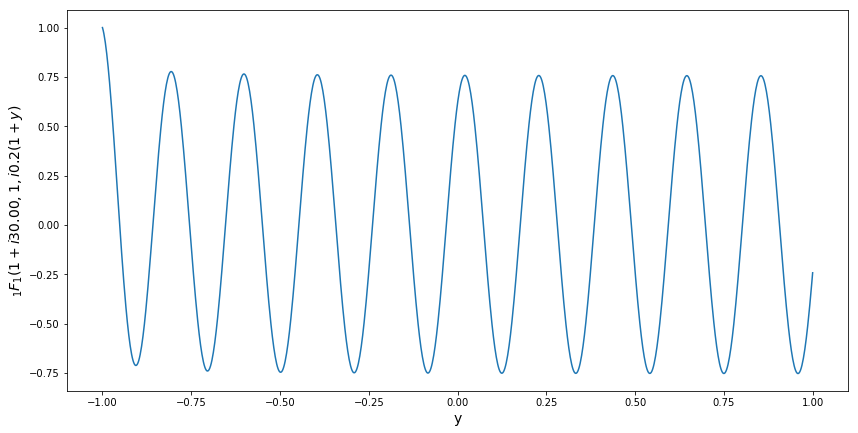

In [74]:
eta=0.2
kr=30
y=np.linspace(-1,1,1000)
A=F(1+1j*eta, 1, 1j*kr*(1+y))
plot(A,eta,kr)

## Plot hypergeometric from my package

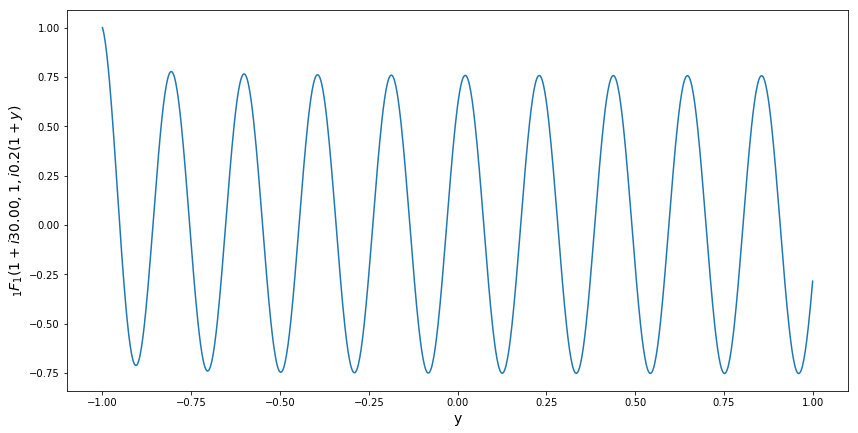

In [142]:
eta=0.2
kr=30
N=1000
y=np.linspace(-1,1,N)
A = kg.hyp1f1y(N, 30, 0.2, 1e-8, 0)
plot(A,eta,kr)

## diff

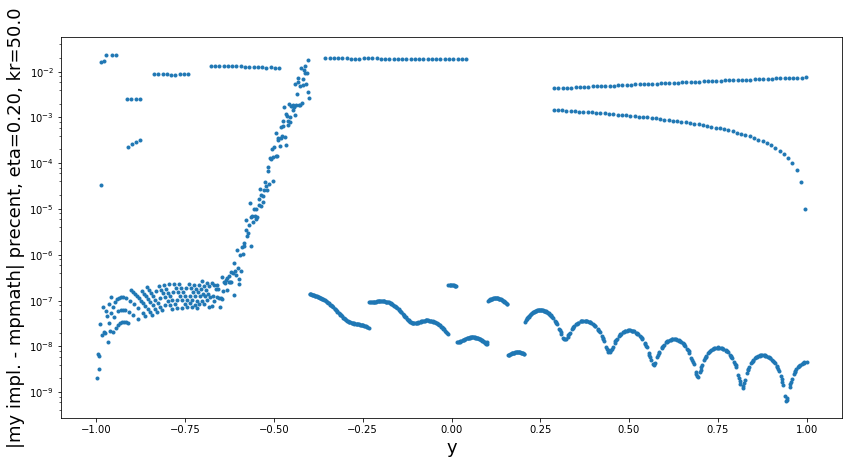

In [16]:
eta=0.2
kr=50
y = np.linspace(-1,1, 1000)
A1 = F(1+1j*eta, 1, 1j*kr*(1+y))
A2  = kg.hyp1f1(1+1j*eta, 1, 1j*kr*(1+y),0, 100, 500000, eps=1e-8)
diff(A1,A2,kr,eta)

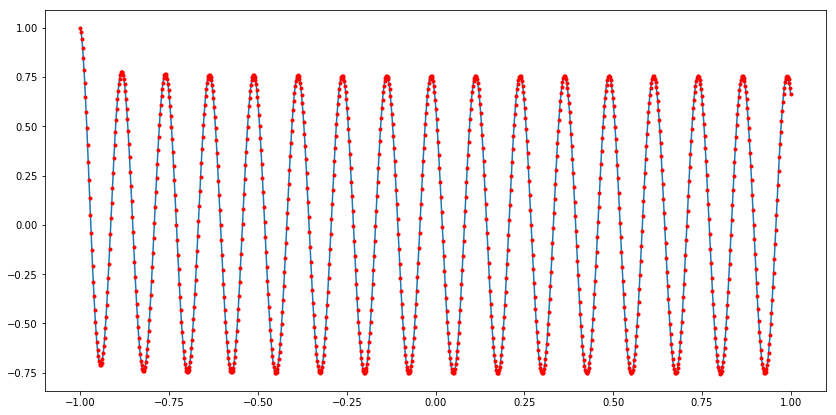

In [17]:
plt.figure(0, (14,7))
plt.plot(y, makefloat(goreal(A1)))
plt.plot(y, A2.real, '.', c='r')

# F(F+F)

In [13]:
def FFF(y, kr, eta):
    return F(1+1j*eta, 1, -1j*kr*(1-y))*(F(1-1j*eta, 1, 1j*kr*(1-y))+F(1-1j*eta, 1, 1j*kr*(1+y)))

## mpmath

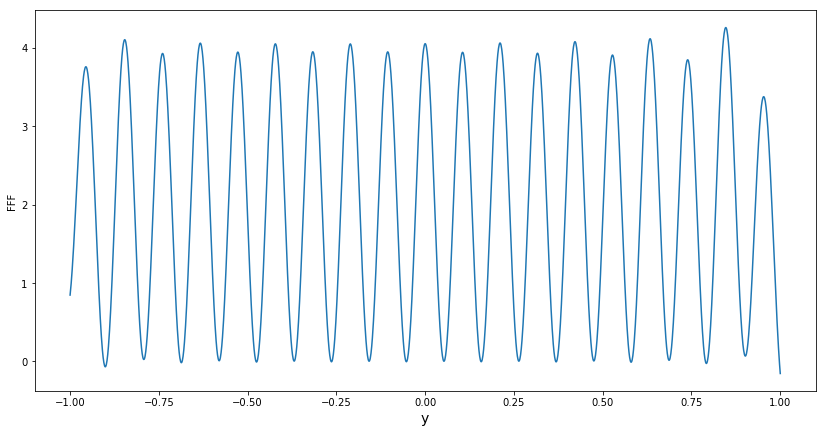

In [14]:
eta=0.2
kr=30
y = np.linspace(-1,1, 2000)
plot(FFF(y,kr,eta),kr,eta, label="FFF")

## my

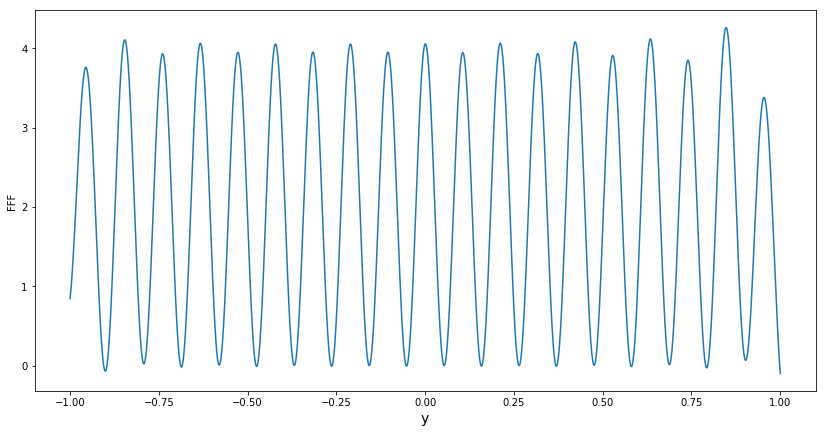

In [15]:
eta=0.2
kr=30
plot(kg.hyp1f1_FFF(2000, kr, eta, 1e-8),kr,eta, label="FFF")

## diff

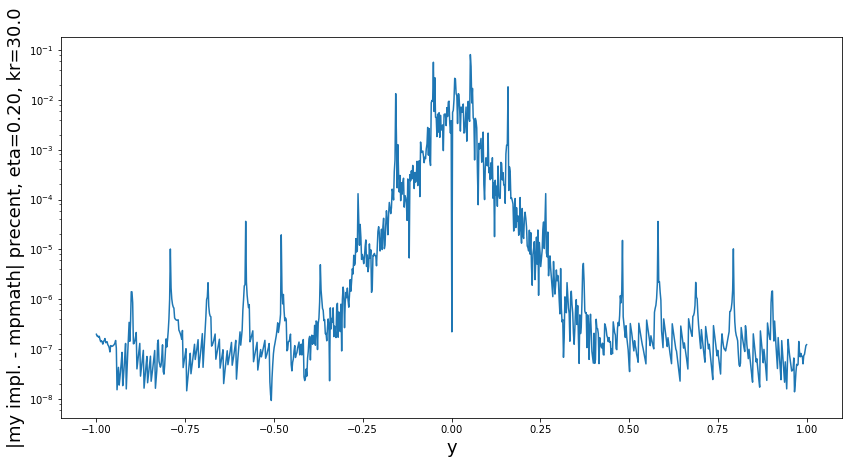

In [21]:
eta=0.2
kr=30
N=1000
dy = 2./float(N)
y=[]
for i in range(N):
    y.append(-1+i*dy)
y=np.array(y)
#y = np.linspace(-1,1, N)
A1 = FFF(y, kr, eta)
A2 = kg.hyp1f1_FFF(len(y), kr, eta, 1e-8)
diff(A1,A2,kr,eta)

# ------------------------------------------------------------------

\begin{equation}
\eta = \frac{\mu\alpha}{2k}=\frac{m_\pi\alpha}{4k}
\end{equation}

$k=xm_\pi$
\begin{equation}
\eta = \frac{\mu\alpha}{2k}=\frac{m_\pi\alpha}{4k}=\frac{\alpha}{4x}
\end{equation}

In [12]:
%%com
eta=0.25
x = alpha

eta = 1e-5

x = alpha*1e+5/4

alpha=1
x=np.linspace(1e-4, 0.25, 1000)
eta = alpha/(4*x)
plt.yscale("log")
plt.plot(x,eta)

ERROR:root:Cell magic `%%com` not found.
